In [13]:
%matplotlib inline
import pandas as pd
import numpy as np

In [9]:
bridge_ru_df = pd.read_csv('user_bridge_data/userstats-bridge-country-2021-12-27-ru-2022-05-28.csv',
                           skiprows=5)
bridge_ru_df

,date,country,users,frac
0,2021-12-27,ru,36346,83
1,2021-12-28,ru,37086,84
2,2021-12-29,ru,36549,81
3,2021-12-30,ru,37017,87
4,2021-12-31,ru,36936,83
...,...,...,...,...
145,2022-05-21,ru,35473,94
146,2022-05-22,ru,35968,94
147,2022-05-23,ru,35095,93
148,2022-05-24,ru,36885,83


In [5]:
relay_ru_df = pd.read_csv('user_relay_data/userstats-relay-country-2021-12-27-ru-2022-05-28-off.csv',
                          skiprows=5)
relay_ru_df

,date,country,users,lower,upper,frac
0,2021-12-27,ru,188788,89009.0,332790.0,92
1,2021-12-28,ru,188408,109443.0,288289.0,93
2,2021-12-29,ru,188505,119579.0,269942.0,94
3,2021-12-30,ru,185934,134711.0,256229.0,94
4,2021-12-31,ru,179789,121038.0,278169.0,94
...,...,...,...,...,...,...
144,2022-05-21,ru,105156,69553.0,138324.0,81
145,2022-05-22,ru,106178,67179.0,138283.0,82
146,2022-05-23,ru,110308,67628.0,148123.0,82
147,2022-05-24,ru,109437,72640.0,134380.0,84


In [15]:
relay_bridge_ru_df = bridge_ru_df.merge(relay_ru_df, 
                                        on=['date', 'country'], 
                                        how='inner', 
                                        suffixes=['_bridge', '_relay'])
relay_bridge_ru_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay
0,2021-12-27,ru,36346,83,188788,89009.0,332790.0,92
1,2021-12-28,ru,37086,84,188408,109443.0,288289.0,93
2,2021-12-29,ru,36549,81,188505,119579.0,269942.0,94
3,2021-12-30,ru,37017,87,185934,134711.0,256229.0,94
4,2021-12-31,ru,36936,83,179789,121038.0,278169.0,94
...,...,...,...,...,...,...,...,...
144,2022-05-21,ru,35473,94,105156,69553.0,138324.0,81
145,2022-05-22,ru,35968,94,106178,67179.0,138283.0,82
146,2022-05-23,ru,35095,93,110308,67628.0,148123.0,82
147,2022-05-24,ru,36885,83,109437,72640.0,134380.0,84


In [21]:
relay_bridge_ru_df['users_br_perc'] = relay_bridge_ru_df['users_bridge'] / \
                                      (relay_bridge_ru_df['users_relay'] + \
                                       relay_bridge_ru_df['users_bridge']) * 100

In [22]:
relay_bridge_ru_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay,users_br_perc
0,2021-12-27,ru,36346,83,188788,89009.0,332790.0,92,16.144163
1,2021-12-28,ru,37086,84,188408,109443.0,288289.0,93,16.446557
2,2021-12-29,ru,36549,81,188505,119579.0,269942.0,94,16.240102
3,2021-12-30,ru,37017,87,185934,134711.0,256229.0,94,16.603200
4,2021-12-31,ru,36936,83,179789,121038.0,278169.0,94,17.042796
...,...,...,...,...,...,...,...,...,...
144,2022-05-21,ru,35473,94,105156,69553.0,138324.0,81,25.224527
145,2022-05-22,ru,35968,94,106178,67179.0,138283.0,82,25.303561
146,2022-05-23,ru,35095,93,110308,67628.0,148123.0,82,24.136366
147,2022-05-24,ru,36885,83,109437,72640.0,134380.0,84,25.208103


<AxesSubplot:xlabel='date'>

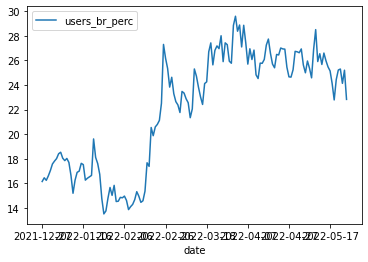

In [24]:
relay_bridge_ru_df.plot('date',
                        'users_br_perc')

In [27]:
br_perc_ru_df = relay_bridge_ru_df[['date', 'users_bridge', 'users_relay', 'users_br_perc']]

Do the same for ukrainian data:

In [28]:
bridge_ua_df = pd.read_csv('user_bridge_data/userstats-bridge-country-2021-12-27-ua-2022-05-28.csv',
                           skiprows=5)
relay_ua_df = pd.read_csv('user_relay_data/userstats-relay-country-2021-12-27-ua-2022-05-28-off.csv',
                          skiprows=5)

In [30]:
relay_bridge_ua_df = bridge_ua_df.merge(relay_ua_df, 
                                        on=['date', 'country'], 
                                        how='inner', 
                                        suffixes=['_bridge', '_relay'])
relay_bridge_ua_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay
0,2021-12-27,ua,653,83,41357,20602.0,78417.0,92
1,2021-12-28,ua,642,84,41962,26229.0,70306.0,93
2,2021-12-29,ua,711,81,42154,28190.0,64796.0,94
3,2021-12-30,ua,656,87,39507,30802.0,59677.0,94
4,2021-12-31,ua,643,83,37774,25805.0,60479.0,94
...,...,...,...,...,...,...,...,...
144,2022-05-21,ua,959,94,37308,25130.0,50777.0,81
145,2022-05-22,ua,936,94,36490,24971.0,52187.0,82
146,2022-05-23,ua,1041,93,37653,24875.0,55318.0,82
147,2022-05-24,ua,999,83,35871,26470.0,49723.0,84


In [31]:
relay_bridge_ua_df['users_br_perc'] = relay_bridge_ua_df['users_bridge'] / \
                                      (relay_bridge_ua_df['users_relay'] + \
                                       relay_bridge_ua_df['users_bridge']) * 100

In [33]:
relay_bridge_ua_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay,users_br_perc
0,2021-12-27,ua,653,83,41357,20602.0,78417.0,92,1.554392
1,2021-12-28,ua,642,84,41962,26229.0,70306.0,93,1.506901
2,2021-12-29,ua,711,81,42154,28190.0,64796.0,94,1.658696
3,2021-12-30,ua,656,87,39507,30802.0,59677.0,94,1.633344
4,2021-12-31,ua,643,83,37774,25805.0,60479.0,94,1.673738
...,...,...,...,...,...,...,...,...,...
144,2022-05-21,ua,959,94,37308,25130.0,50777.0,81,2.506076
145,2022-05-22,ua,936,94,36490,24971.0,52187.0,82,2.500935
146,2022-05-23,ua,1041,93,37653,24875.0,55318.0,82,2.690340
147,2022-05-24,ua,999,83,35871,26470.0,49723.0,84,2.709520


<AxesSubplot:xlabel='date'>

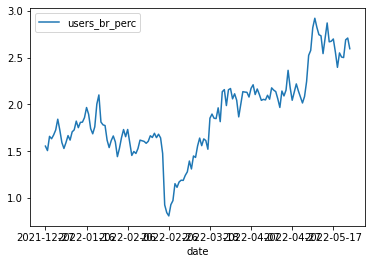

In [34]:
relay_bridge_ua_df.plot('date',
                        'users_br_perc')

In [35]:
br_perc_ua_df = relay_bridge_ua_df[['date', 'users_bridge', 'users_relay', 'users_br_perc']]
br_perc_ua_df

,date,users_bridge,users_relay,users_br_perc
0,2021-12-27,653,41357,1.554392
1,2021-12-28,642,41962,1.506901
2,2021-12-29,711,42154,1.658696
3,2021-12-30,656,39507,1.633344
4,2021-12-31,643,37774,1.673738
...,...,...,...,...
144,2022-05-21,959,37308,2.506076
145,2022-05-22,936,36490,2.500935
146,2022-05-23,1041,37653,2.690340
147,2022-05-24,999,35871,2.709520


In [39]:
ukr_rus_df = br_perc_ua_df.merge(br_perc_ru_df, 
                    on='date',
                    how='inner',
                    suffixes=['_ukr', '_rus'])
ukr_rus_df

,date,users_bridge_ukr,users_relay_ukr,users_br_perc_ukr,users_bridge_rus,users_relay_rus,users_br_perc_rus
0,2021-12-27,653,41357,1.554392,36346,188788,16.144163
1,2021-12-28,642,41962,1.506901,37086,188408,16.446557
2,2021-12-29,711,42154,1.658696,36549,188505,16.240102
3,2021-12-30,656,39507,1.633344,37017,185934,16.603200
4,2021-12-31,643,37774,1.673738,36936,179789,17.042796
...,...,...,...,...,...,...,...
144,2022-05-21,959,37308,2.506076,35473,105156,25.224527
145,2022-05-22,936,36490,2.500935,35968,106178,25.303561
146,2022-05-23,1041,37653,2.690340,35095,110308,24.136366
147,2022-05-24,999,35871,2.709520,36885,109437,25.208103


For all users:

In [41]:
bridge_all_df = pd.read_csv('user_bridge_data/userstats-bridge-country-2021-12-27-all-2022-05-28.csv',
                           skiprows=5)
relay_all_df = pd.read_csv('user_relay_data/userstats-relay-country-2021-12-27-all-2022-05-28-off.csv',
                          skiprows=5)

In [42]:
relay_bridge_all_df = bridge_all_df.merge(relay_all_df, 
                                        on=['date', 'country'], 
                                        how='inner', 
                                        suffixes=['_bridge', '_relay'])
relay_bridge_all_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay
0,2021-12-27,NaN,78588,83,2582025,NaN,NaN,92
1,2021-12-28,NaN,80154,84,2487691,NaN,NaN,93
2,2021-12-29,NaN,81248,81,2496662,NaN,NaN,94
3,2021-12-30,NaN,78933,87,2475604,NaN,NaN,94
4,2021-12-31,NaN,78528,83,2352201,NaN,NaN,94
...,...,...,...,...,...,...,...,...
144,2022-05-21,NaN,70625,94,2979390,NaN,NaN,81
145,2022-05-22,NaN,71623,94,2868764,NaN,NaN,82
146,2022-05-23,NaN,71856,93,2740249,NaN,NaN,82
147,2022-05-24,NaN,71296,83,2745070,NaN,NaN,84


In [43]:
relay_bridge_all_df['users_br_perc'] = relay_bridge_all_df['users_bridge'] / \
                                      (relay_bridge_all_df['users_relay'] + \
                                       relay_bridge_all_df['users_bridge']) * 100

In [44]:
relay_bridge_all_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay,users_br_perc
0,2021-12-27,NaN,78588,83,2582025,NaN,NaN,92,2.953755
1,2021-12-28,NaN,80154,84,2487691,NaN,NaN,93,3.121450
2,2021-12-29,NaN,81248,81,2496662,NaN,NaN,94,3.151700
3,2021-12-30,NaN,78933,87,2475604,NaN,NaN,94,3.089914
4,2021-12-31,NaN,78528,83,2352201,NaN,NaN,94,3.230636
...,...,...,...,...,...,...,...,...,...
144,2022-05-21,NaN,70625,94,2979390,NaN,NaN,81,2.315562
145,2022-05-22,NaN,71623,94,2868764,NaN,NaN,82,2.435836
146,2022-05-23,NaN,71856,93,2740249,NaN,NaN,82,2.555239
147,2022-05-24,NaN,71296,83,2745070,NaN,NaN,84,2.531489


<AxesSubplot:xlabel='date'>

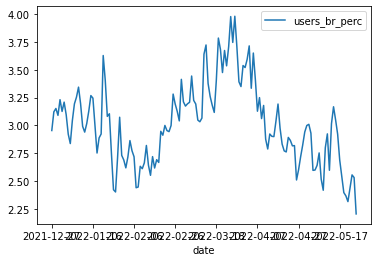

In [45]:
relay_bridge_all_df.plot('date',
                        'users_br_perc')

In [60]:
br_perc_all_df = relay_bridge_all_df[['date', 'users_bridge', 'users_relay', 'users_br_perc']]

ukr_rus_all_df = ukr_rus_df.merge(br_perc_all_df, 
                    on='date',
                    how='inner',
                    suffixes=['_bc', '_total'])
ukr_rus_all_df

,date,users_bridge_ukr,users_relay_ukr,users_br_perc_ukr,users_bridge_rus,users_relay_rus,users_br_perc_rus,users_bridge,users_relay,users_br_perc
0,2021-12-27,653,41357,1.554392,36346,188788,16.144163,78588,2582025,2.953755
1,2021-12-28,642,41962,1.506901,37086,188408,16.446557,80154,2487691,3.121450
2,2021-12-29,711,42154,1.658696,36549,188505,16.240102,81248,2496662,3.151700
3,2021-12-30,656,39507,1.633344,37017,185934,16.603200,78933,2475604,3.089914
4,2021-12-31,643,37774,1.673738,36936,179789,17.042796,78528,2352201,3.230636
...,...,...,...,...,...,...,...,...,...,...
144,2022-05-21,959,37308,2.506076,35473,105156,25.224527,70625,2979390,2.315562
145,2022-05-22,936,36490,2.500935,35968,106178,25.303561,71623,2868764,2.435836
146,2022-05-23,1041,37653,2.690340,35095,110308,24.136366,71856,2740249,2.555239
147,2022-05-24,999,35871,2.709520,36885,109437,25.208103,71296,2745070,2.531489


In [59]:
ukr_rus_all_df.to_csv('relay_bridge_2021-2022_data.csv', index=False)

Let's add relay/bridge for Iran

In [61]:
bridge_ir_df = pd.read_csv('user_bridge_data/userstats-bridge-country-2021-12-27-ir-2022-05-28.csv',
                           skiprows=5)
relay_ir_df = pd.read_csv('user_relay_data/userstats-relay-country-2021-12-27-ir-2022-05-28-off.csv',
                          skiprows=5)

In [63]:
relay_bridge_ir_df = bridge_ir_df.merge(relay_ir_df, 
                                        on=['date', 'country'], 
                                        how='inner', 
                                        suffixes=['_bridge', '_relay'])
relay_bridge_ir_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay
0,2021-12-27,ir,3179,83,11851,5306.0,20875.0,92
1,2021-12-28,ir,3230,84,11904,6583.0,18249.0,93
2,2021-12-29,ir,3229,81,11558,7095.0,16880.0,94
3,2021-12-30,ir,2733,87,10859,7495.0,15051.0,94
4,2021-12-31,ir,3058,83,10576,6605.0,16033.0,94
...,...,...,...,...,...,...,...,...
145,2022-05-22,ir,2133,94,11504,7219.0,15591.0,82
146,2022-05-23,ir,2116,93,10909,6955.0,15999.0,82
147,2022-05-24,ir,1901,84,10561,7350.0,14282.0,85
148,2022-05-25,ir,2131,94,10776,6962.0,15338.0,81


In [67]:
relay_bridge_ir_df['users_br_perc'] = relay_bridge_ir_df['users_bridge'] / \
                                      (relay_bridge_ir_df['users_relay'] + \
                                       relay_bridge_ir_df['users_bridge']) * 100

relay_bridge_ir_df.rename(columns={'users_bridge':'users_bridge_ir',
                                   'users_relay':'users_relay_ir',
                                   'users_br_perc':'users_br_perc_ir'}, inplace=True)

In [70]:
br_perc_ir_df = relay_bridge_ir_df[['date', 'users_bridge_ir', 'users_relay_ir', 'users_br_perc_ir']]

ukr_rus_ir_all_df = ukr_rus_all_df.merge(br_perc_ir_df, 
                    on='date',
                    how='inner',
                    suffixes=None)

ukr_rus_ir_all_df.to_csv('ukr_rus_ir_all_bridge_relay_2011-2022.csv', index=False)

/var/folders/4x/tkx04hw96mv2b5sr5mnp_5b80000gp/T/ipykernel_3687/2227551209.py:3: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  ukr_rus_ir_all_df = ukr_rus_all_df.merge(br_perc_ir_df,
